In [1]:
# 1.	Load the basic libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')

In [2]:
# 2.	Load the dataset

dataset = pd.read_csv("/content/TCS Historical Data.csv")
print(dataset.head())

         Date     Price      Open      High       Low   Vol. Change %
0  28-03-2024  3,876.30  3,850.10  3,915.00  3,840.50  4.31M    0.92%
1  27-03-2024  3,840.90  3,888.50  3,895.00  3,829.40  1.97M   -0.94%
2  26-03-2024  3,877.50  3,875.00  3,946.70  3,871.45  3.44M   -0.85%
3  22-03-2024  3,910.90  3,897.00  3,938.00  3,855.00  5.85M   -1.56%
4  21-03-2024  3,972.95  3,990.05  4,008.40  3,948.00  3.83M    0.05%


In [3]:
# 3.	Analyse the dataset

# Summary statistics
print(dataset.describe())

# Dataset info
print(dataset.info())


              Date     Price      Open      High       Low   Vol. Change %
count         1055      1055      1055      1055      1055   1055     1055
unique        1055      1045       951      1009      1014    430      469
top     28-03-2024  2,190.95  3,300.54  3,245.91  3,060.00  1.79M    0.08%
freq             1         2         3         3         3     10        8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1055 non-null   object
 1   Price     1055 non-null   object
 2   Open      1055 non-null   object
 3   High      1055 non-null   object
 4   Low       1055 non-null   object
 5   Vol.      1055 non-null   object
 6   Change %  1055 non-null   object
dtypes: object(7)
memory usage: 57.8+ KB
None


In [5]:
# 4.	Apply LSTM Model

# Extract the feature column for modeling
tcs_training = dataset.iloc[:, 3:4].values

# Convert the 'Price' column to numeric, removing commas
tcs_training = tcs_training.astype(str)  # Convert to string type
tcs_training = np.char.replace(tcs_training, ',', '').astype(float)  # Remove commas and convert to float

# Normalize the feature using Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
tcs_training_scaled = scaler.fit_transform(tcs_training)

# Create the feature set and labels
feature_set = []
labels = []

for i in range(200, 1055):
    feature_set.append(tcs_training_scaled[i-200:i, 0])
    labels.append(tcs_training_scaled[i, 0])

# Convert to numpy arrays
feature_set = np.array(feature_set)
labels = np.array(labels)

# Reshape feature set for LSTM input
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

# Initialize the model
model = Sequential()

# Add LSTM layers with Dropout
model.add(LSTM(units=60, return_sequences=True, input_shape=(feature_set.shape[1], 1)))
model.add(Dropout(0.20))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

model.add(LSTM(units=60))
model.add(Dropout(0.20))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [6]:
# 5.	Apply the training over the dataset to minimize the loss

history = model.fit(feature_set, labels, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 518ms/step - accuracy: 0.0000e+00 - loss: 0.1418 - val_accuracy: 0.0058 - val_loss: 0.0295
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 496ms/step - accuracy: 0.0000e+00 - loss: 0.0124 - val_accuracy: 0.0058 - val_loss: 0.0226
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 496ms/step - accuracy: 0.0000e+00 - loss: 0.0092 - val_accuracy: 0.0058 - val_loss: 0.0187
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 483ms/step - accuracy: 0.0000e+00 - loss: 0.0081 - val_accuracy: 0.0058 - val_loss: 0.0146
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 497ms/step - accuracy: 0.0000e+00 - loss: 0.0088 - val_accuracy: 0.0058 - val_loss: 0.0068
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 496ms/step - accuracy: 0.0000e+00 - loss: 0.0066 - val_accuracy: 0.0058 - val_loss: 0.0044
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 496ms/step - accuracy: 0.0000e+00 - loss: 0.0068 - val_accuracy: 0.0058 - val_loss: 0.0033
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 460ms/step - accura

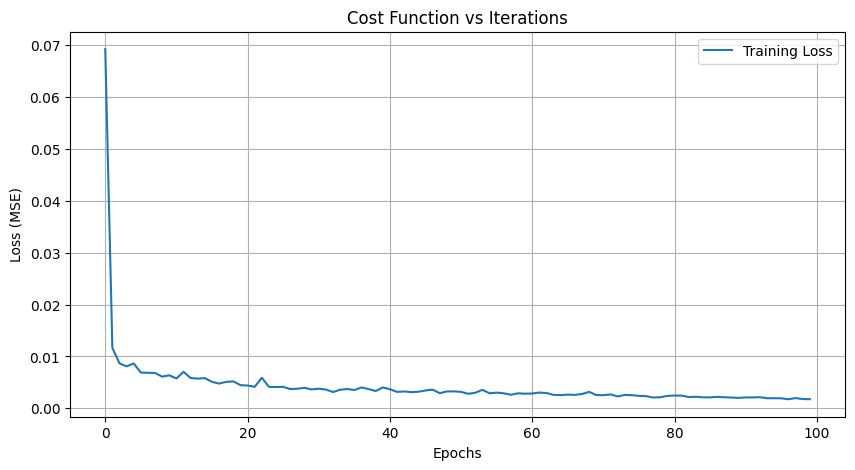

In [7]:
# 6.	Observe the cost function vs iterations learning curve

# Plot cost function (loss) vs iterations (epochs)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Cost Function vs Iterations')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Result

In [8]:
# a.	Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 200, 60)             │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200, 60)             │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 200, 60)             │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 60)                  │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,185 (1.17 MB)

 Trainable params: 102,061 (398.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204,124 (797.36 KB)

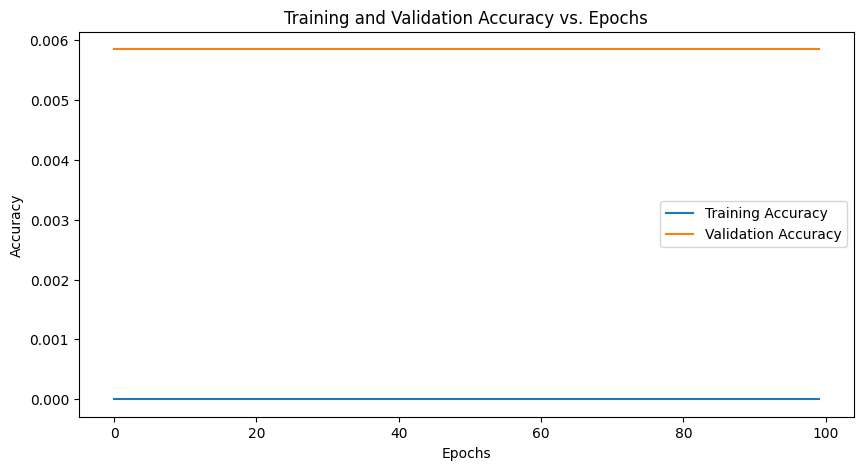

In [9]:
# b.	Training and Validation accuracy v/s epochs

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


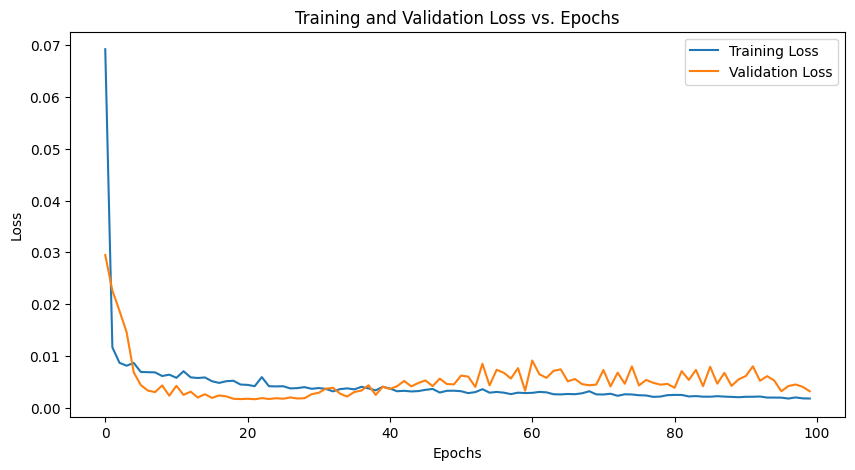

In [10]:
# c.	Training and Validation loss v/s epochs

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


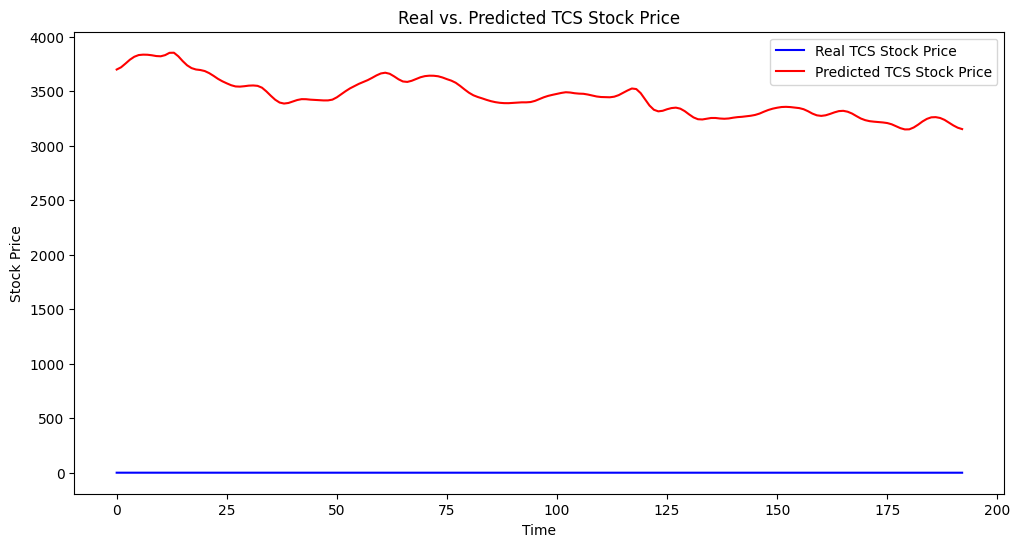

In [13]:
# d. Visualize the Predicted and originalStock Price

# Prepare testing data
testing_data = dataset.iloc[:, 1:2].values
test_feature = testing_data.reshape(-1, 1)
# Convert the 'Price' column to numeric, removing commas
test_feature = test_feature.astype(str)
test_feature = np.char.replace(test_feature, ',', '').astype(float)
test_feature = scaler.transform(test_feature)

testing_features = []

for i in range(60, 253):
    testing_features.append(test_feature[i-60:i, 0])

testing_features = np.array(testing_features)
testing_features = np.reshape(testing_features, (testing_features.shape[0], testing_features.shape[1], 1))

# Predict the stock prices
predictions = model.predict(testing_features)
predictions = scaler.inverse_transform(predictions)

# Visualize the results
plt.figure(figsize=(12, 6))
# Extract the numerical values from testing_data for plotting
plt.plot(test_feature[60:253], color='blue', label='Real TCS Stock Price')
plt.plot(predictions, color='red', label='Predicted TCS Stock Price')
plt.title('Real vs. Predicted TCS Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()